<a href="https://colab.research.google.com/github/techllen/AI_ML_projects/blob/main/Lending_Club_Loan_Approval_System/Allen_Mwita_Loan_Approval_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='56c3ea'><h1><b>Name : Allen Matare Mwita<b></h1></font>

<font color='56c3ea'><h1><b>Uplevel email address : allenmwita21@gmail.com<b></h1></font>

<font color='56c3ea'><h1><b>Problem Statement Name : Lending Club Loan Approval System<b></h1></font>

<font color='56c3ea'><h1><b>Lending Club Loan Approval System<b></h1></font>

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

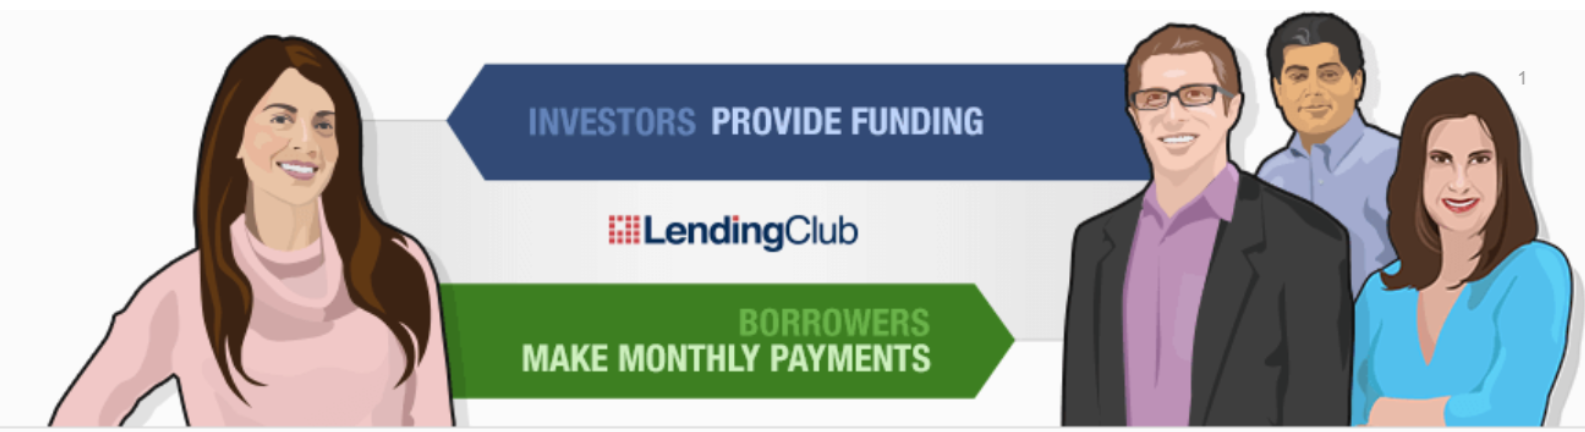

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.


<font color='Green'><h1><b>Problem statement Understanding<b></h1></font>
<p> To help the client save time and increase revenue and profit ,the model that will be created should be capable of the following
<ul>
<li>Predict customers who can repay loan and put them in a proper class to increase profit</li>
<li>Predict customers who cannot repay the loan and put them in a proper class to reduce losses</li>
<li>To the best of its ability , the model should not assess customer who cannot pay and put them in another group and vise versa that is customer who can pay should not be in defaulters</li>
<li>Generally the model aims at reducing false positives and false negatives</li>
</ul>
</p>

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

<font color='56c3ea'><h1><b>1 Data Loading<b></h1></font>

<font color='56c3ea'><h1><b>1.1 Necessary Imports and dataset observation<b></h1></font>

In [ ]:
!pip install pycaret > /dev/null 2>&1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pycaret.classification import setup, compare_models

In [ ]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading data from  google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Load the dataset
loan_data = pd.read_csv('/content/drive/MyDrive/AI_ML/datasets/case_study_datasets/loans.csv')

In [ ]:
## Observe the first few rows
loan_data.head()
## Do you observe any issues? - answer in the markup cell below

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


<font color='Green'><h1><b>Observations<b></h1></font>
<ul>
<li>The dataset contains several features(columns) such as id, member_id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, purpose, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, last_pymnt_amnt, loan_status</li>
<li>Some feature contains a mixture of numbers and string / special characters (percentages)for proper analysis these features might need cleaning .The features are term , int_rate , emp_length , revol_util </li>
<li>Some of the features in the dataset shows order of categories (grade, sub_grade)
<li>Some of the features in the dataset shows categories which are not ordered (home_ownership, verification_status, or purpose)
</ul>
</p>

In [ ]:
## Check the dataframe structure - datatypes and number of non-null rows
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [ ]:
## Check the shape
loan_data.shape

(38770, 23)

In [ ]:
## Check the missing values across the columns
loan_data.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


<font color='Green'><h1><b>Observations<b></h1></font>
<ul>
<li>The dataset consist of numerical and object data types</li>
<li>Some columns with object data types such as term , int_rate , emp_length , revol_util etc contains special characters and they might need cleaning down the road</li>
<li>From the shape of the data it shows that the dataset has 23 features(columns) and the total number of entries(rows) is 38770</li>
<li>Out of 23 features 2 features have null values , emp_length	with 1036 null entries and revol_util	with 50 null entries which confirms the output of loan_data.info() above</li>
</ul>
</p>

<font color='56c3ea'><h1><b>2 Summary statistics<b></h1></font>






<font color='56c3ea'><h1><b>2.1 Descriptive statistics for numerical features<b></h1></font>

In [ ]:
# Summary Statistics Before Cleaning
loan_data.describe()

,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt
count,3.877000e+04,3.877000e+04,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,6.769960e+05,8.430892e+05,11069.122388,322.629489,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,22.059788,2735.887820
std,2.090226e+05,2.641345e+05,7362.292600,208.592815,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,11.420556,4486.352373
min,5.473400e+04,7.069900e+04,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.127032e+05,6.619100e+05,5325.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,13.000000,216.822500
50%,6.579935e+05,8.410920e+05,9737.500000,278.150000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,20.000000,565.400000
75%,8.287202e+05,1.037010e+06,15000.000000,426.100000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,29.000000,3425.470000
max,1.077501e+06,1.314167e+06,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,36115.200000


<font color='Green'><h1><b>Observations<b></h1></font>
<h3>Interpretation of Descriptive Statistics for Numerical Features</h3>
<h4>loan_amnt</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: the average loan amount provided by the club is 11069</li>
<li>Standard Deviation: 7362 , shwowing wide range of loans being offered to customers</li>
<li>Min and Max:the club offers very small loans as small as 500 to big loans which can cover things such as house down payment as large as 35K</li>
</ul>

<h4>installment(monthly)</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: the average monthly payment for customers of the club is 322 </li>
<li>Min and Max: some customers are allocated to pay as low as 15 per month to 1305 indicating high payment to some customers</li>
</ul>

<h4>annual_inc</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: average self reported annual income of customers is around 68.8K</li>
<li>Standard Deviation: 64161 , shwowing wide range of reported income for customers</li>
<li>Min and Max: From 4K to 6M showing a huge income gap among borrowers</li>
</ul>

<h4>dti(dept to income ratio)</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: average monthly total dept payment of customer is 0.13 times what they earn monthly(gross)  , meaning they have more disposable income to handle other expenses</li>
<li>Min and Max: 0 dti indicate that some customers have finished paying their depts completely/ are not paying at all.Max dti of 0.29 means even the customers with highest dti can still handle other expenses because of wigle room in their income and less defaulting</li>
</ul>

<h4>delinq_2yrs(30+ past due incidences in last 2 yrs)</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: an average customer is late less than once(0.146660) times in the past two years(almost never been late)</li>
<li>Min and Max: Max deliq_2yrs is 11 meaning some customers are late once every two months in the past two years </li>
</ul>

<h4>inq_last_6mths</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: the average number of loan inquiry that customers get is less than once(0.871473) in six months indicating that most customer are financially stable and do not rely so much on borrowing</li>
<li>Min and Max: there are customers who stick with this loan only and only this(min inq is 0) , while others can have up to 8 other financal institution doing credit check on them 1.3(8 times / 6 months) times every month showing some customers are less financial stable then others</li>
<li></li>
</ul>

<h4>open_acc</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: an average customer has 9.278850 credit lines opened</li>
<li>Standard Deviation:</li>
<li>Min and Max: lowest number of credit lines opened by customers is 4 while the largest number is 44 this is due to availability of many financial opetions in US</li>
</ul>

<h4>pub_rec</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: An average customer has less than 1 (0.055404)derogatory public record , indicating that the club has good quality of customers</li>
<li>Min and Max:min is 0 max is 4 indicationg some customers do not  have any record at all</li>
</ul>

<h4>revol_bal</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: An average customer owes 13297 on their revolving credit accounts</li>
<li>Standard Deviation: 15861.575434 shows high variability in the balances customers has</li>
<li>Range: from 0 indicating some customers have paid all their balances to 149588  that other customers owe at max</li>
</ul>

<h4>total_acc</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: An average customer has 22 credit lines recorded in their files</li>
<li>Range: From 2 minimum some customers do not have a habit of borrowing money to 90 maximum meaning some customers have a habit of borrowing money and depend of extra credit from financuial instituitions</li>
</ul>

<h4>last_pymnt_amnt</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Mean: an average customer payment amount is 2735 greater than average installment amount of 322 indicating some customer have capacity to pay more the allocated installment amount hence finishing therir loans earlier </li>
<li>Min and Max: 0 minimum indicating some customers do not pay at all at due date, while others paid up to 36115 compared to 1305 as max allocated installement amoun</li>
</ul>
</p>

<font color='56c3ea'><h1><b>2.2 Descriptive statistics for categorical features<b></h1></font>

In [ ]:
# Summary Statistics For Categorical Features Before Cleaning
loan_data.describe(include=['object'])

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,revol_util,loan_status
count,38770,38770,38770,38770,37734,38770,38770,38770,38720,38770
unique,2,371,7,35,11,5,3,14,1088,2
top,36 months,10.99%,B,A4,10+ years,RENT,Not Verified,debt_consolidation,0%,Fully Paid
freq,29096,928,11726,2874,8547,18550,16732,18145,960,33136


<font color='Green'><h1><b>Observations<b></h1></font>
<h3>Interpretation of Descriptive Statistics for Categorical Features</h3>
<h4>term</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 2 classes ( 36 and 60 months terms)</li>
<li>Most frequent: Majority customer have 36 months term</li>
</ul>

<h4>int_rate</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 371 classes </li>
<li>Most frequent: 10.99% interest rate is the most common amongs customers</li>
</ul>

<h4>grade</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 7 classes of grade</li>
<li>Most frequent: B , is the most assigned LC grade to customers</li>
</ul>

<h4>sub_grade</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 35 classes</li>
<li>Most frequent: A4 is the most sub assigned LC sub grade to customers </li>
</ul>

<h4>emp_length</h4>
<ul>
<li>Count: 37734 , there are 1036 missing values</li>
<li>Unique: 11 classes</li>
<li>Most frequent: Majority customer have 10+ years of employment</li>
</ul>

<h4>home_ownership</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 5 classes( RENT, OWN, MORTGAGE, OTHER )</li>
<li>Most frequent: Most of the borowers are RENTERS</li>
</ul>

<h4>verification_status</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 3 classe</li>
<li>Most frequent: Majority Customers's incomes are Not verified by LC</li>
</ul>

<h4>purpose</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 14 classes</li>
<li>Most frequent: Majority of the customers are here for dept consolidation</li>
</ul>

<h4>revol_util</h4>
<ul>
<li>Count: 38720 , there are 50 missing values<</li>
<li>Unique: 1088 classes</li>
<li>Most frequent: Majority are 0%(most customers do not use the credit available) , explains why Mojority customers are here to consolidate their depts and pay them not spend - most purpose is consolidate(simplify payments, reduce monthly costs, or secure better loan terms)</li>
</ul>

<h4>loan_status</h4>
<ul>
<li>Count: 38770 , no missing entry</li>
<li>Unique: 2 classes</li>
<li>Most frequent: Most loans have a Fully Paid status(have been paid)</li>
</ul>

<font color='56c3ea'><h1><b>3 Data Cleaning<b></h1></font>


<font color='56c3ea'><h1><b>3.1 Missing value treatment<b></h1></font>

In [ ]:
## Dropping Columns with Many Missing Values
# RULE OF THUMB
# if missing values count is > 70% of the data delete the attribute

def get_columns_to_drop(loan_data, threshold=70):
  """Identifies columns with more than a specified percentage of missing values.

  Args:
    loan_data: The input Pandas DataFrame.
    threshold: The percentage threshold for missing values (default is 70).

  Returns:
    A list of column names to drop.
  """

  # Calculate missing values percentage for each column
  missing_values_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

  # Filter columns exceeding the threshold
  columns_to_drop = missing_values_percentage[missing_values_percentage > threshold].index.tolist()

  # Return columns
  if len(columns_to_drop) > 0:
    return columns_to_drop

  return f'All columns exceeds The percentage threshold({threshold}%) for missing values, no column to drop'

In [ ]:
# call function to analyse columns to drop
columns_to_drop = get_columns_to_drop(loan_data)
print(columns_to_drop)

All columns exceeds The percentage threshold(70%) for missing values, no column to drop


In [ ]:
# Dropping off columns with missing values > 70%
# loan_data = loan_data.drop(columns=columns_to_drop)


<font color='56c3ea'><h1><b>3.2 Filling Missing Values<b></h1></font>

In [ ]:
## Columns with missing values
# Get a boolean mask for columns with more than 0 missing values
mask = loan_data.isnull().sum() > 0

# Filtering columns with missing values
columns_with_missing_values = (loan_data.loc[:, mask]).columns.tolist()
print(columns_with_missing_values)

['emp_length', 'revol_util']


In [ ]:
## checking info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [ ]:
# Because both column with null value are object type, replace the values with mode

# Fill missing 'emp_length' values with the mode
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)

# Fill missing 'revol_util' values with the mode
loan_data['revol_util'].fillna(loan_data['revol_util'].mode()[0], inplace=True)

In [ ]:
## checking info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           38770 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

<font color='Green'><h1><b>Observations<b></h1></font>
<p>All missing values have been cleared



<font color='56c3ea'><h1><b>3.3 Remove extra symbols, special characters, etc. from appropriate columns<b></h1></font>

In [ ]:
## Observer loan data
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


<font color='Green'><h1><b>Observations from step 01<b></h1></font>
<ul>
<p>Feature that contain a mixture of numbers and string / special characters / symbols are term , int_rate , emp_length , revol_util <p>
<ul>
<li>term has "months" string attached to it</li>
<li>int_rate has % attached to it</li>
<li>emp_length has string "years" attached to it</li>
<li>revol_util has % attached to it</li>
</ul>

In [ ]:
## Removing special chars/string/symbols

## For int_rate and revol_util remove %
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')

In [ ]:
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [ ]:
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')

In [ ]:
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,Fully Paid


In [ ]:
## For term and emp_length remove evarything remain with numbers and decimal
loan_data['term']  = loan_data['term'] .astype(str).str.replace(r"[^0-9.]", "", regex=True) # anything thus not matching regex (decimal) gets replaced

In [ ]:
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,Fully Paid


In [ ]:
loan_data['emp_length']  = loan_data['emp_length'] .astype(str).str.replace(r"[^0-9.]", "", regex=True) # # anything thus not matching regex (decimal) gets replaced

In [ ]:
loan_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,Fully Paid


<font color='Green'><h1><b>Observations from Data Cleaning<b></h1></font>
<ul>
<li> From above dataframe % strings and other special characters which are not needed have been replaced and cleaned</li>
<ul>
</ul>

<font color='56c3ea'><h1><b>3.4 Dropping the unnecessary columns<b></h1></font>
- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [ ]:
## Drop the above columns
## Due to above reasons, below columns are going to be dropped
unnecessary_columns = ['id','member_id','installment','last_pymnt_amnt']
loan_data = loan_data.drop(columns=unnecessary_columns)

In [ ]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,B,B2,10,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60,15.27,C,C4,1,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36,13.49,C,C1,10,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21,37.0,Fully Paid
4,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid


In [ ]:
## Checking the dataframe again, expecting (23 - 4), columns
loan_data.shape[1]

19

<font color='Green'><h1><b>Observations from Removing unnecessaty columns<b></h1></font>
<ul>
<li> From above dataframe shape and dataframe observation 4 columns have been dropped and we are remaining with 19 columns </li>
<ul>
</ul>

<font color='56c3ea'><h1><b>3.5 Data type conversion<b></h1></font>

In [ ]:
## checking info
loan_data.info()
# loan_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  object 
 2   int_rate             38770 non-null  object 
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   emp_length           38770 non-null  object 
 6   home_ownership       38770 non-null  object 
 7   annual_inc           38770 non-null  float64
 8   verification_status  38770 non-null  object 
 9   purpose              38770 non-null  object 
 10  dti                  38770 non-null  float64
 11  delinq_2yrs          38770 non-null  float64
 12  inq_last_6mths       38770 non-null  float64
 13  open_acc             38770 non-null  float64
 14  pub_rec              38770 non-null  float64
 15  revol_bal            38770 non-null 

In [ ]:
# identifying object columns
object_columns = loan_data.select_dtypes(include='object').columns.tolist()
print(object_columns)

['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'revol_util', 'loan_status']


In [ ]:
loan_data.select_dtypes(include='object').describe()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,revol_util,loan_status
count,38770,38770,38770,38770,38770,38770,38770,38770,38770,38770
unique,2,371,7,35,10,5,3,14,1088,2
top,36,10.99,B,A4,10,RENT,Not Verified,debt_consolidation,0,Fully Paid
freq,29096,928,11726,2874,9583,18550,16732,18145,1010,33136


<font color='Green'><h1><b>Data types Observations<b></h1></font>

<p>Two types of data are present in a Data frame float64 and Object</p>
<ul>
<li>For memory optimization , better performance for categorical operations and analysis columns with object datatype ( int_rate, grade,sub_grade,emp_length,home_ownership,verification_status, purpose,revol_util,loan_status) types will be converted to categorical</li>
</ul>

In [ ]:
# converting object clumns to categorical and boolean datatypes
object_columns = loan_data.select_dtypes(include='object').columns.tolist()

# convert object_columns to categorical
loan_data[object_columns] = loan_data[object_columns].astype('category')

print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            38770 non-null  float64 
 1   term                 38770 non-null  category
 2   int_rate             38770 non-null  category
 3   grade                38770 non-null  category
 4   sub_grade            38770 non-null  category
 5   emp_length           38770 non-null  category
 6   home_ownership       38770 non-null  category
 7   annual_inc           38770 non-null  float64 
 8   verification_status  38770 non-null  category
 9   purpose              38770 non-null  category
 10  dti                  38770 non-null  float64 
 11  delinq_2yrs          38770 non-null  float64 
 12  inq_last_6mths       38770 non-null  float64 
 13  open_acc             38770 non-null  float64 
 14  pub_rec              38770 non-null  float64 
 15  revol_bal          

In [ ]:
# checking category data
loan_data.select_dtypes(include='category').describe()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,revol_util,loan_status
count,38770,38770,38770,38770,38770,38770,38770,38770,38770,38770
unique,2,371,7,35,10,5,3,14,1088,2
top,36,10.99,B,A4,10,RENT,Not Verified,debt_consolidation,0,Fully Paid
freq,29096,928,11726,2874,9583,18550,16732,18145,1010,33136


<font color='Green'><h1><b>Observations after datatype conversions<b></h1></font>

<ul>
<li>From info above,All object datatypes have been converted to category datatype</li>

</ul>

<font color='56c3ea'><h1><b>3.6 Removing duplicates<b></h1></font>

In [ ]:
# Check for duplicates
loan_data_duplicates = loan_data.duplicated().sum()
print(f"Number of duplicate rows: {loan_data_duplicates}")

Number of duplicate rows: 0


<font color='Green'><h1><b>Observations for Duplicates<b></h1></font>

<ul>
<li>The dataset has no duplicates, as the number of duplicates is 0</li>

</ul>


<font color='56c3ea'><h1><b>4 Exploratory Data Analysis<b></h1></font>

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

<font color='56c3ea'><h1><b>4.1 Univariate Analysis<b></h1></font>

Univariate analysis on the following variables.
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

<font color='56c3ea'><h1><b>4.1.1 Univariate Analysis loan Status: Are customers finishing paying their loans?<b></h1></font>

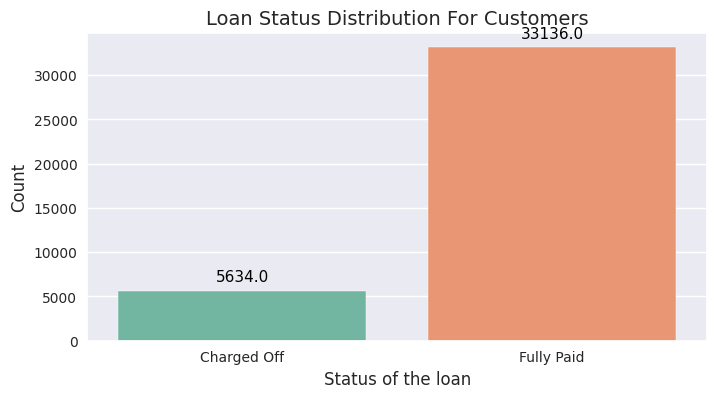

In [ ]:
# Calculate percentages
total_count = len(loan_data)
class_counts = loan_data['loan_status'].value_counts()
percentages = (class_counts / total_count) * 100

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(8, 4))

# Plot the gender distribution with an improved color palette and aesthetics
sns.countplot(x='loan_status', data=loan_data, palette='Set2')

# Add titles and labels
plt.title('Loan Status Distribution For Customers', fontsize=14)
plt.xlabel('Status of the loan', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with the count of each category
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')


# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Loan Status for customers<b></h1></font>

<ul>
<li>85% of loans have been fully paid by customers</li>

</ul>

<font color='56c3ea'><h1><b>4.1.2 Univariate Analysis Term : Whats the distribution with the amount of time each customer is allocated to paying the loan?<b></h1></font>

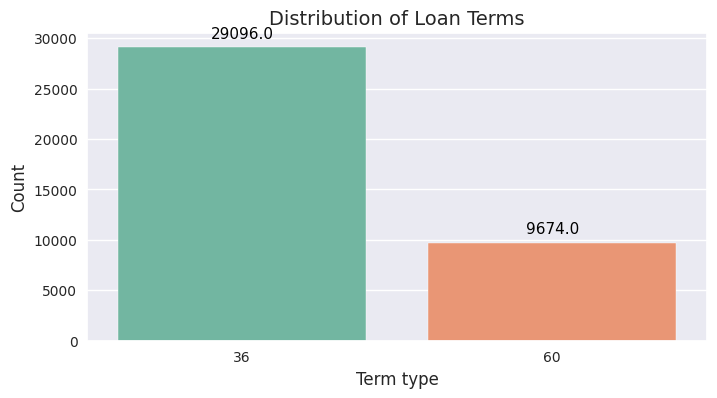

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(8, 4))

# Plot the gender distribution with an improved color palette and aesthetics
sns.countplot(x='term', data=loan_data, palette='Set2')

# Add titles and labels
plt.title('Distribution of Loan Terms', fontsize=14)
plt.xlabel('Term type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with the count of each category
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Loan terms allocated to customers<b></h1></font>

<ul>
<li>Most of the customer's loan are set up with 36 months loan term, which agrees with stpe 2.2 </li>

</ul>

<font color='56c3ea'><h1><b>4.1.3 Univariate Analysis of LC Assigned Grade: Whats the distribution of Lending club grades assigned to customers?<b></h1></font>

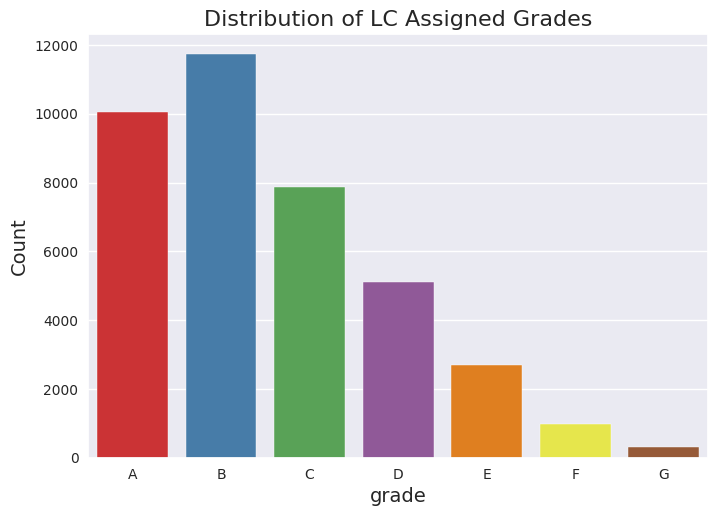

In [ ]:
# Create a plot
sns.countplot(x='grade', data=loan_data, palette='Set1')

# Add titles and labels with improved font sizes
plt.title('Distribution of LC Assigned Grades', fontsize=16)
plt.xlabel('grade', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of LC Assigned Grades<b></h1></font>

<ul>
<li>A being the highest-grade, lowest-interest loan(wikipedia), most customers took loans of grade "B" which is not of Highest grade , may be caused by other characteristics of grade B which make it more attractive to grade A</li>

</ul>

<font color='56c3ea'><h1><b>4.1.4 Univariate Analysis purpose: Why do customers take the loans?<b></h1></font>

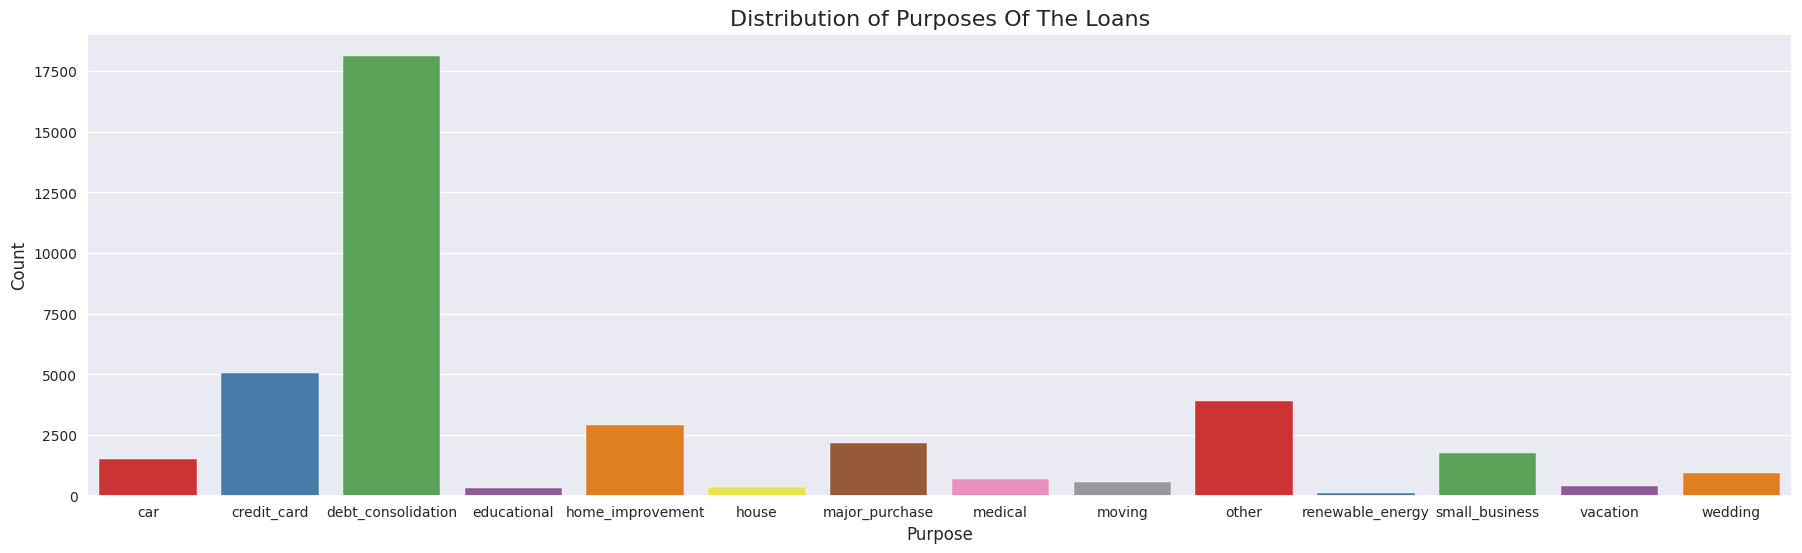

In [ ]:
# Create a plot
plt.figure(figsize=(22, 6))  # Adjust width and height as needed

sns.countplot(x='purpose', data=loan_data, palette='Set1')

# Add titles and labels with improved font sizes
plt.title('Distribution of Purposes Of The Loans', fontsize=16)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Purpose<b></h1></font>

<ul>
<li>Majority of the customers took the loan(17500+) for loan consilidation pruposes(agrees with analysis in step 2.2) , followed by loans(5000) for credit card depts</li>
<li>Loans taken for renewable energy are the least in count</li>
</ul>

<font color='56c3ea'><h1><b>Step 4.1.5 Univariate Analysis of Amount Of Loan Taken : whats the distribution of loan amounts taken by customers of LC<b></h1></font>

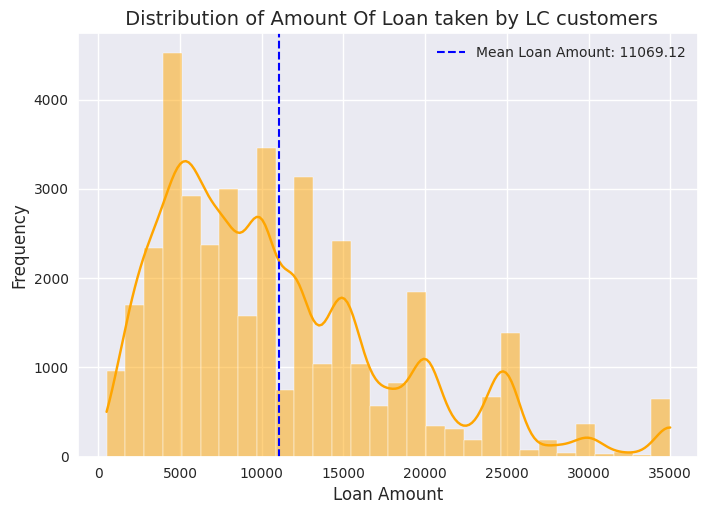

In [ ]:
# Plot the distribution of Loan Amount with a different color
sns.histplot(loan_data['loan_amnt'].dropna(), bins=30, kde=True, color='orange')

# Add titles and labels
plt.title(' Distribution of Amount Of Loan taken by LC customers', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean loan amount
maean_loan_amnt = loan_data['loan_amnt'].mean()
plt.axvline(maean_loan_amnt, color='blue', linestyle='--', linewidth=1.5, label=f'Mean Loan Amount: {maean_loan_amnt:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Loan Amount<b></h1></font>

<ul>
<li>Distribution of loan amount is right-skewed , most of the loasn taken are less than 10K falling in lower ranges of loans</li>
<li>The peak for the amount of loan borrowed is around 5000 , indicating most customer take loans of around 5000</li>
<li>Range , starts just above 0 to 35000 , showing wide range of loans taken by customers</li>
</ul>

<font color='56c3ea'><h1><b>Step 4.1.6 Univariate Analysis annual Income : How does distribution for customer annual income look like?<b></h1></font>

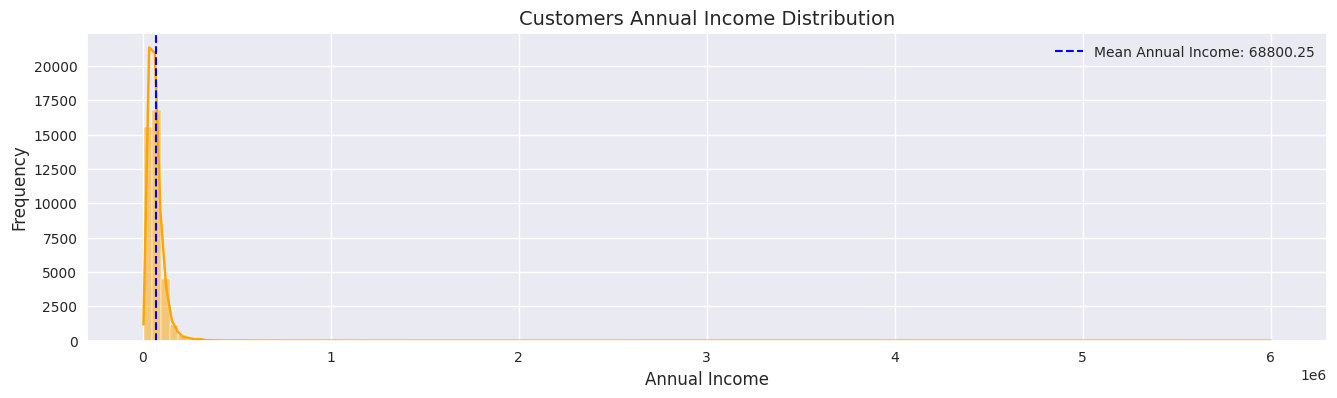

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(16, 4))

# Plot the distribution of age
sns.histplot(loan_data['annual_inc'].dropna(), bins=130, kde=True, color='orange')

# Add titles and labels
plt.title('Customers Annual Income Distribution', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean age
mean_annual_income = loan_data['annual_inc'].mean()
plt.axvline(mean_annual_income, color='blue', linestyle='--', linewidth=1.5, label=f'Mean Annual Income: {mean_annual_income:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Customer's Annual Income<b></h1></font>

<ul>
<li>Distribution of annual income is highly right-skewed , most customer's income is in the lower range ( below 50000)</li>
<li>The peak customer annual income is below 50k, indicatiing most customers have mid-low income</li>
<li>Range , starts just above 0 to 600000 , showing wide range of customers' income</li>
<li>The spread of the data with very long tail to the right indicates that few customers have a significantly high income </li>
</ul>

<font color='56c3ea'><h1><b>4.2 Bivariate/Multivariate Analysis<b></h1></font>
<P>For the bivariate analysis, below analysis have been performed:

- How the default rate varies across the different variables
- Correlation Matrix
- Who finishes paying their loans(normal income customers of high income csutsomers)?
-Which grade of the loans get paid the most?
-How is income related to the amount of loan taken? are people with lower income take large loans to complement their incomes?
-How is the purpose of the loan related to the amount of the loan and grade?
-What factors affects decision of the grade of the loan given to the customer?
-What features co relate the most with loan status?

<font color='56c3ea'><h1><b>4.2.1 Who finishes paying their loans?<b></h1></font>


In [ ]:
for col in loan_data.columns:
  print(col)

loan_amnt
term
int_rate
grade
sub_grade
emp_length
home_ownership
annual_inc
verification_status
purpose
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
loan_status


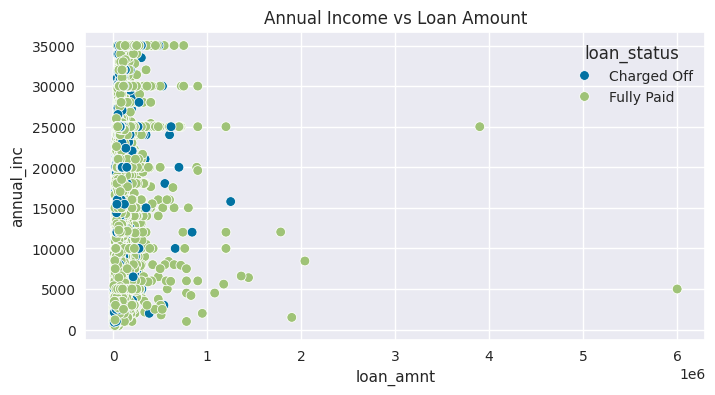

In [ ]:
# Scatter Plot on Annual Income vs Loan Amount separating the Loan status as well

plt.figure(figsize=(8, 4))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('loan_amnt')
plt.ylabel('annual_inc')
plt.show()

<font color='Green'><h1><b>Interpretation <b></h1></font>

-The distribution of Fully paid loans is fair among customers however Lower income customers seems to be more associated with paying their loans fully.

-Lower amount loans are taken by customers of all income ranges , which negates the statement that Lower income customers take loans to complement their income.

-Charged off loans and fully paid loans are distributed across customers of all income levels

-There is a notable cluster of loan amount in the lower range( btn 0 and 0.5 x 1000000) that are fully paid , confirming that these loans of lower amount are affordable and can be paid by customers.

-Fully paid loans are hight dispersed accross different loan amount ranges especially higher loans

-Charged off loans are clustered at lower loan amount ranges, indicating most charged off loans are of lower amount

<font color='56c3ea'><h1><b>4.2.2 From Bivariate scatter plot, its observed that income and loan amount is related to Status of the loan. Lets see how income/loan amount is distributed among fully paid loans and charged off loans<b></h1></font>


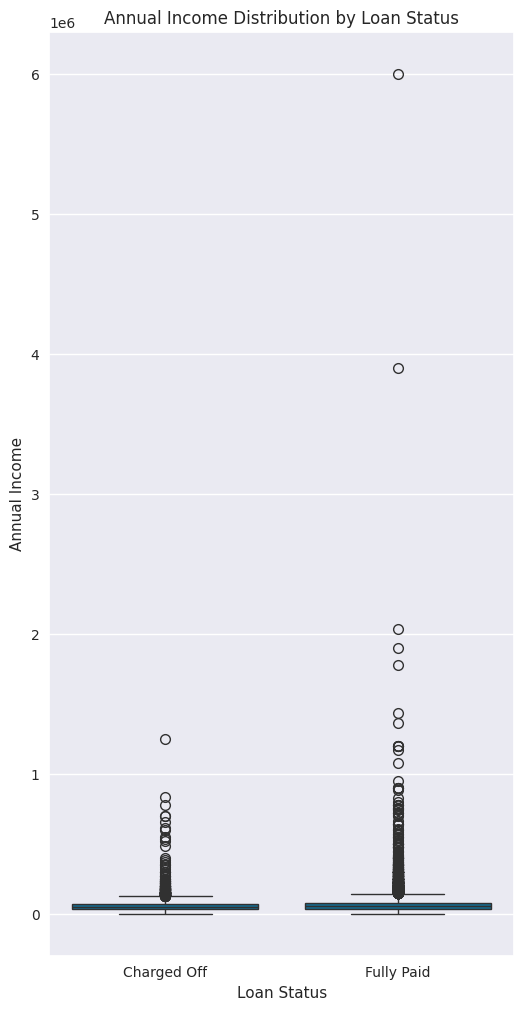

In [ ]:
# Annual Income vs. Loan Status
plt.figure(figsize=(6, 12))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data , )
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

<font color='Green'><h1><b>Interpretation <b></h1></font>

-Both fully paid loans and charged off loans have similar median annual income

-Central annual income(middle 50%) for fully paid loans and charged off loans are quite similar ,  indicating majority of people in both group fall under the same income category( lowe income category)

-There are slightly more lower income customers who paid loans in full, shown as outliers in fully paid group , which confirms with what we observed in the scatter plot


-Fully paid loans customer have slightly wide range of income , which means there is more variations in the income of customers who paid their loans

-Both scatter plot and box plot shows that there are more lower income customers who have paid their loans , shown by  majority of them being concentrated btn o and 75th percentile

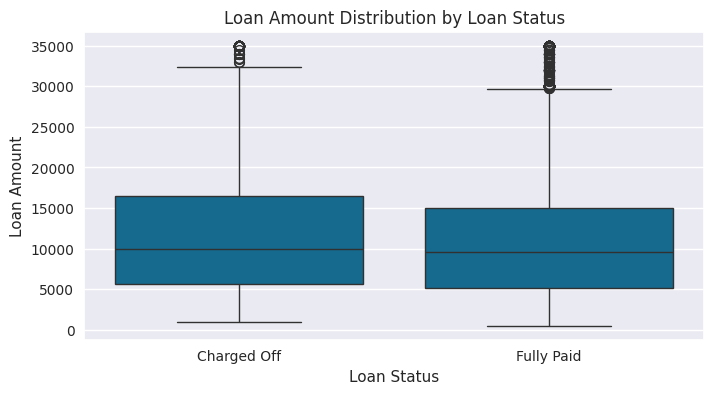

In [ ]:
# Annual Income vs. Loan Status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data , )
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

<font color='Green'><h1><b>Interpretation <b></h1></font>

-Both fully paid loans and charged off loans have similar median loan amount

-Central Loan amount(middle 50%) for fully paid loans and charged off loans are quite similar ,  indicating majority of people in both group took the same amount of loans.

-Both the scatter plot and box plot indicate that more lower amount loans have been fully paid, shown by height of the box in fully paid category.

<font color='56c3ea'><h1><b>4.2.3 Multivariate Analysis<b></h1></font>


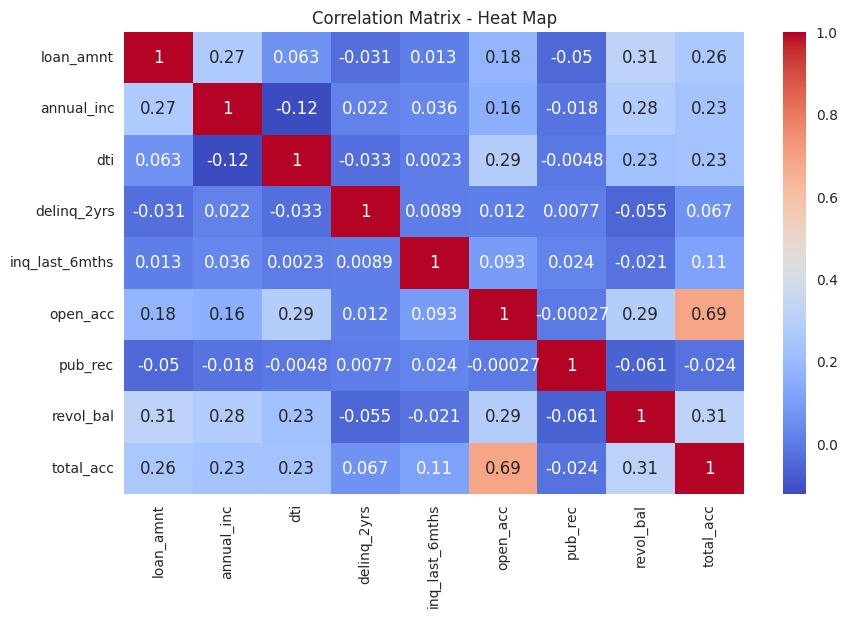

In [ ]:
# Correlation matrix - Heat Map
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation matrix
numerical_cols = loan_data.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Heat Map')
plt.show()

<font color='Green'><h1><b>Interpretation <b></h1></font>

-Moderate positive correlation (0.27) between loan amount (loan_amnt) and annual income (annual_inc): Higher incomes are associated with larger loan amounts.

-Weak positive correlation (0.31) between loan amount (loan_amnt) and revolving balance (revol_bal): Higher loan amounts are slightly associated with higher revolving balances.

-Weak positive correlation (0.26) between loan amount (loan_amnt) and total accounts (total_acc): Larger loans are slightly associated with a higher number of total accounts.

-Weak negative correlation (-0.05) between loan amount (loan_amnt) and public records (pub_rec): Higher loan amounts are slightly associated with fewer public records.

-Weak negative correlation (-0.12) between annual income (annual_inc) and debt-to-income ratio (dti): Higher annual incomes are associated with slightly lower debt-to-income ratios, indicating customers who can afford to pay the depts have good annual income

-Moderate positive correlation (0.29) between debt-to-income ratio (dti) and open accounts (open_acc): Higher debt-to-income ratios are moderately associated with a larger number of open accounts , indicating that with so many depts its hard to keep up paying all of them hence los dti

-Strong positive correlation (0.69) between open accounts (open_acc) and total accounts (total_acc): A larger number of open accounts is strongly associated with a higher total account count.

-Weak positive correlation (0.31) between revolving balance (revol_bal) and total accounts (total_acc): Higher revolving balances are slightly associated with more total accounts, with many accounts customers will dalay and cause balance to raise

-Weak negative correlation (-0.05) between delinquent accounts in the last two years (delinq_2yrs) and loan amount (loan_amnt): Slightly fewer delinquencies are associated with higher loan amounts.

-Very weak correlations (< |0.1|) between most variables (e.g., inquiries in the last 6 months, public records) and others: These relationships indicate negligible association.

<font color='56c3ea'><h1><b>5: Outliers<b></h1></font>


In [ ]:
loan_data.describe()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
count,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,11069.122388,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,22.059788
std,7362.292600,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,11.420556
min,500.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5325.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,13.000000
50%,9737.500000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,20.000000
75%,15000.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,29.000000
max,35000.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000


In [ ]:
# removing outliers for all numerical columns
# Select only numerical columns for correlation matrix
numerical_cols = loan_data.select_dtypes(include=[np.number])

# a function to remove outliers
def remove_outliers_iqr(df, num_columns):

  for column in num_columns:
    # Calculate quantiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return filtered_df

loan_data =  remove_outliers_iqr( loan_data , numerical_cols)

In [ ]:
loan_data.describe()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
count,38255.000000,3.825500e+04,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000
mean,11028.938047,6.834077e+04,13.241567,0.145916,0.866475,9.159639,0.055967,13154.541210,21.556659
std,7338.971544,6.404139e+04,6.678233,0.489806,1.068594,4.247807,0.238785,15723.823043,10.621416
min,500.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5250.000000,4.000000e+04,8.090000,0.000000,0.000000,6.000000,0.000000,3621.000000,13.000000
50%,9600.000000,5.800000e+04,13.320000,0.000000,1.000000,9.000000,0.000000,8690.000000,20.000000
75%,15000.000000,8.100000e+04,18.510000,0.000000,1.000000,12.000000,0.000000,16757.000000,28.000000
max,35000.000000,6.000000e+06,29.990000,11.000000,8.000000,39.000000,4.000000,149588.000000,53.000000


<font color='Green'><h1><b>Interpretation <b></h1></font>

Observing the count before and after removal of outlier 445 records with outliers have been removed

<font color='56c3ea'><h1><b>6 Pre-ML Data Pre-Processing<b></h1></font>

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

<font color='56c3ea'><h1><b>6.1 Encoding variables and Feature Engineering<b></h1></font>


<font color='56c3ea'><h1><b>6.1.1 Encoding on all the categorical variables<b></h1></font>

-Numeric Conversion:

Directly convert numerical-like strings (emp_length ,term or int_rate).

-Label encoding

Convert numerical to binary (loan status)


-Ordinal Encoding (for ordered categories):

Encode grade, sub_grade where categories have a natural order.


-One-Hot Encoding (for unordered categories):

Encode features like home_ownership, verification_status, or purpose.
Create separate columns for each category (RENT, OWN, MORTGAGE).

In [ ]:
# Numeric conversion for terms , int_rate and emp length
loan_data['term'] = loan_data['term'].astype(int)
loan_data['int_rate'] = loan_data['int_rate'].astype(float)
loan_data['emp_length'] = loan_data['emp_length'].astype(float)

loan_data.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
count,38255.000000,38255.000000,38255.000000,38255.000000,3.825500e+04,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000
mean,11028.938047,41.968161,11.935460,5.179820,6.834077e+04,13.241567,0.145916,0.866475,9.159639,0.055967,13154.541210,21.556659
std,7338.971544,10.373993,3.686862,3.445731,6.404139e+04,6.678233,0.489806,1.068594,4.247807,0.238785,15723.823043,10.621416
min,500.000000,36.000000,5.420000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5250.000000,36.000000,8.940000,2.000000,4.000000e+04,8.090000,0.000000,0.000000,6.000000,0.000000,3621.000000,13.000000
50%,9600.000000,36.000000,11.710000,4.000000,5.800000e+04,13.320000,0.000000,1.000000,9.000000,0.000000,8690.000000,20.000000
75%,15000.000000,36.000000,14.420000,9.000000,8.100000e+04,18.510000,0.000000,1.000000,12.000000,0.000000,16757.000000,28.000000
max,35000.000000,60.000000,24.400000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,39.000000,4.000000,149588.000000,53.000000


In [ ]:
# Label Encoding for binary features
label_encoder = LabelEncoder()
loan_data['loan_status'] = label_encoder.fit_transform(loan_data['loan_status'])

loan_data.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,loan_status
count,38255.000000,38255.000000,38255.000000,38255.000000,3.825500e+04,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000,38255.000000
mean,11028.938047,41.968161,11.935460,5.179820,6.834077e+04,13.241567,0.145916,0.866475,9.159639,0.055967,13154.541210,21.556659,0.854555
std,7338.971544,10.373993,3.686862,3.445731,6.404139e+04,6.678233,0.489806,1.068594,4.247807,0.238785,15723.823043,10.621416,0.352554
min,500.000000,36.000000,5.420000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5250.000000,36.000000,8.940000,2.000000,4.000000e+04,8.090000,0.000000,0.000000,6.000000,0.000000,3621.000000,13.000000,1.000000
50%,9600.000000,36.000000,11.710000,4.000000,5.800000e+04,13.320000,0.000000,1.000000,9.000000,0.000000,8690.000000,20.000000,1.000000
75%,15000.000000,36.000000,14.420000,9.000000,8.100000e+04,18.510000,0.000000,1.000000,12.000000,0.000000,16757.000000,28.000000,1.000000
max,35000.000000,60.000000,24.400000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,39.000000,4.000000,149588.000000,53.000000,1.000000


In [ ]:
# Ordinal Encoding for ordered categories
# retreive grades

loan_data['grade'].value_counts()

,count
grade,
B,11590
A,9935
C,7787
D,5052
E,2652
F,953
G,286


In [ ]:
# Ordinal Encoding for ordered categories
# retreive subgrades

loan_data['sub_grade'].value_counts()

,count
sub_grade,
A4,2850
B3,2815
A5,2687
B5,2604
B4,2410
C1,2041
B2,1987
C2,1919
A3,1786


In [ ]:
# Ordinal Encoding for ordered categories(grade and subgrade)
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
loan_data['grade'] = loan_data['grade'].map(grade_mapping)

subgrade_mapping = {
    'A4': 1, 'B3': 2, 'A5': 3, 'B5': 4, 'B4': 5, 'C1': 6, 'B2': 7, 'C2': 8,
    'A3': 9, 'B1': 10, 'A2': 11, 'C3': 12, 'D2': 13, 'C4': 14, 'C5': 15,
    'A1': 16, 'D3': 17, 'D1': 18, 'D4': 19, 'D5': 20, 'E1': 21, 'E2': 22,
    'E3': 23, 'E4': 24, 'E5': 25, 'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29,
    'F5': 30, 'G1': 31, 'G2': 32, 'G4': 33, 'G3': 34, 'G5': 35
}

loan_data['sub_grade'] = loan_data['sub_grade'].map(subgrade_mapping)

loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,2,7,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,1
1,2500.0,60,15.27,3,14,1.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0
2,2400.0,36,15.96,3,15,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,1
3,10000.0,36,13.49,3,6,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21,37.0,1
4,5000.0,36,7.90,1,1,3.0,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,1


In [ ]:
# 0ne hot encoding for home_ownership , verification_status , purpose (3 columns) - unordered categories
loan_data = pd.get_dummies(loan_data, columns=['home_ownership', 'verification_status', 'purpose'], drop_first=True)
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,2,7,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,1,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2500.0,60,15.27,3,14,1.0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2400.0,36,15.96,3,15,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,10000.0,36,13.49,3,6,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21,37.0,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5000.0,36,7.90,1,1,3.0,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


<font color='56c3ea'><h1><b>6.1.2 Dropping highly correlated features<b></h1></font>


In [ ]:
# opened accounts and total accounts are highly co-related , total_acc is
# dropped(can include closed accounts which we dont need)
loan_data=loan_data.drop(columns=['total_acc'])
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,loan_status,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,2,7,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,1,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2500.0,60,15.27,3,14,1.0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2400.0,36,15.96,3,15,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,10000.0,36,13.49,3,6,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5000.0,36,7.90,1,1,3.0,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


<font color='56c3ea'><h1><b>6.2 Handling Class Imbalance using SMOTE<b></h1></font>

<font color='56c3ea'><h1><b>6.2.1 Are the classes for Target Variable Inbalanced?<b></h1></font>

In [ ]:
## checking for classes available
print(f'Classes before SMOTE')
loan_data['loan_status'].value_counts()

Classes before SMOTE


,count
loan_status,
1,32691
0,5564


<font color='Green'><h1><b>Interpretation <b></h1></font>

-Of all the total records 32691 belongs to another class , showing Imbalance among classes

<font color='56c3ea'><h1><b>6.3 Train-test split<b></h1></font>

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [ ]:
# Splitting our dataset between training and testing set
# getting X and y
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

# convert x and y to array to prevent NAN during smote and scaling
X_arr = np.array(X)
y_arr = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

<font color='Green'><h1><b>Why loan status is a target variable?<b></h1></font>

-Business wise it helps to tell the final status of the loan after everything
has happened

-Aligns with classification problem, we are trying to decide weather the loan was fully paid or not using different variables

<font color='56c3ea'><h1><b>6.4 Applying SMOTE for class imbalance<b></h1></font>

In [ ]:
## Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert the resampled data to NumPy arrays (if they are not already)
X_train_smote = np.array(X_train_smote)
X_test = np.array(X_test)

<font color='56c3ea'><h1><b>6.5 Scaling</h1></font>

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the SMOTE-resampled training data
scaler.fit(X_train_smote)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Check for null values after smote and scaling
print(np.isnan(X_train_scaled).sum())

0


In [ ]:
print(np.isnan(X_test_scaled).sum())

0


<font color='56c3ea'><h1><b>7.0 Model Building and Model Evaluation</h1></font>

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.

> Add blockquote


- Select the best possible model that you will be using for classfication

<font color='Green'><h1><b>Model Selection <b></h1></font>

<font color='Green'><h1><b>Why Classification Models <b></h1></font>

The problem we are solving here is trying to decide weather to give a loan to somebody or not which falls under classification problems

There are different types of model for classfification , for this project below models will be explored

`Logistic Regression`

`Gradient Boosting Classifier`

`Random Forest Classifier`

<font color='56c3ea'><h1><b>7.1 Logistic Regression</h1></font>

<font color='56c3ea'><h1><b>7.1.1 Logistic Regression : building model</h1></font>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix , f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train_smote)

# Predict probabilities for the test set (to calculate AUC later)
y_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Make predictions test data
y_pred_logistic_test = logistic_model.predict(X_test_scaled)

# Make predictions train data
y_pred_logistic_train = logistic_model.predict(X_train_scaled)

<font color='56c3ea'><h1><b>7.1.2 Model evaluation ,checking for overfitting and underfitting</h1></font>



In [ ]:
# Calculate Precision, Recall, and F1 Score for test data
precision_test = precision_score(y_test, y_pred_logistic_test)
recall_test = recall_score(y_test, y_pred_logistic_test)
f1_test = f1_score(y_test, y_pred_logistic_test)

# Print the evaluation metrics
print("\nTest Set Metrics:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

# Calculate Precision, Recall, and F1 Score for train data
precision_train = precision_score(y_train_smote, y_pred_logistic_train)
recall_train = recall_score(y_train_smote, y_pred_logistic_train)
f1_train = f1_score(y_train_smote, y_pred_logistic_train)

# Print the evaluation metrics
print("\nTrain Set Metrics:")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")


Test Set Metrics:
Precision: 0.9176
Recall: 0.6542
F1 Score: 0.7638

Train Set Metrics:
Precision: 0.6580
Recall: 0.6517
F1 Score: 0.6549


<font color='Green'><h1><b>Interpretation <b></h1></font>

<p>1. The model perform differently on training and testing set<p/>

-Precison seems to be high on test set compared to training set meaning the model is really good at detecting false positive

-Recall is smimilar between train and test set meaning the model does a good job detecting false negatives in both set but may need to be improved , this value affects F1 score as well.

-The models performs well on both datasets(especially test) , However values of recall and f1scores needs to be improved - see hyperparameter tuning

<br>
<p>2. The train and test metrics are closely aligned, indicating the model is not overfitting and generalizes well across datasets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot the Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_test))

Confusion Matrix:
 [[ 692  386]
 [2273 4300]]


In [ ]:
from sklearn.metrics import classification_report
## Plot the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.64      0.34      1078
           1       0.92      0.65      0.76      6573

    accuracy                           0.65      7651
   macro avg       0.58      0.65      0.55      7651
weighted avg       0.82      0.65      0.70      7651



<font color='56c3ea'><h1><b>7.1.3 Logistic Regression : Cross Validations and Hyper Parameter Tuning</h1></font>

In [ ]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'l1_ratio': [0.1, 0.5, 0.9]
}

logistic_model = LogisticRegression(
         max_iter=1000,
         random_state=42,
         class_weight={0: 1, 1: 2}  # Give the positive class (1) twice the weight
     )

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train_smote)

# Step 5: Get the best parameters and best estimator
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 6: Make predictions on the test set using the best model
y_pred_logistic_best = best_logistic_model.predict(X_test_scaled)

y_pred_logistic_best_train = best_logistic_model.predict(X_train_scaled)

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision_logistic_best_lr = precision_score(y_test, y_pred_logistic_best)
recall_logistic_best_lr = recall_score(y_test, y_pred_logistic_best)
f1_logistic_best_lr = f1_score(y_test, y_pred_logistic_best)

# Step 8: Print the evaluation metrics
print(f"Best Model Precision: {precision_logistic_best_lr:.4f}")
print(f"Best Model Recall: {recall_logistic_best_lr:.4f}")
print(f"Best Model F1 Score: {f1_logistic_best_lr:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Model Precision: 0.8882
Best Model Recall: 0.8924
Best Model F1 Score: 0.8903


<font color='Green'><h1><b>Observations <b></h1></font>

-Compared to previously untuned model , the tuned model shows an imprvement in f1 score and recall despite a slight decrease in precision

-This suggests that hyperparameter tuning can help with improving model's performance.

<font color='56c3ea'><h1><b>7.2 Random Forest Classifier</h1></font>

<font color='56c3ea'><h1><b>7.2.1 Random Forest Classifier : building model</h1></font>

In [ ]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model with n_estimators=10
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the test set
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Make predictions on the training set
y_pred_rf_train = rf_model.predict(X_train_scaled)

<font color='56c3ea'><h1><b>7.2.2 Model evaluation ,checking for overfitting and underfitting</h1></font>



In [ ]:
# Calculate Precision, Recall, and F1 Score for the test set
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)

# Print the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Precision: {precision_rf_test:.4f}")
print(f"Recall: {recall_rf_test:.4f}")
print(f"F1 Score: {f1_rf_test:.4f}")

# Calculate Precision, Recall, and F1 Score for the training set
precision_rf_train = precision_score(y_train_smote, y_pred_rf_train)
recall_rf_train = recall_score(y_train_smote, y_pred_rf_train)
f1_rf_train = f1_score(y_train_smote, y_pred_rf_train)

# Print the evaluation metrics for the training set
print("\nTraining Set Metrics:")
print(f"Precision: {precision_rf_train:.4f}")
print(f"Recall: {recall_rf_train:.4f}")
print(f"F1 Score: {f1_rf_train:.4f}")


Test Set Metrics:
Precision: 0.8678
Recall: 0.9458
F1 Score: 0.9051

Training Set Metrics:
Precision: 0.9941
Recall: 0.9989
F1 Score: 0.9964


<font color='Green'><h1><b>Interpretation <b></h1></font>

-The training metrics indicate great performance,suggesting potential overfitting where the model is overly tailored to the training data.

-The model generalizes well to the test data based on high F1 and recall but may need regularization or additional data augmentation to reduce overfitting and improve real-world performance further.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot the Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_test))

Confusion Matrix:
 [[ 131  947]
 [ 356 6217]]


In [ ]:
from sklearn.metrics import classification_report
## Plot the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.12      0.17      1078
           1       0.87      0.95      0.91      6573

    accuracy                           0.83      7651
   macro avg       0.57      0.53      0.54      7651
weighted avg       0.78      0.83      0.80      7651



<font color='56c3ea'><h1><b>7.2.3 Random Forest Classifier : Cross Validations and Hyper Parameter Tuning</h1></font>

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train_smote)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
y_pred_rf_best_test = best_rf_model.predict(X_test_scaled)

# Make predictions on the test set using the best model
y_pred_rf_best_train = best_rf_model.predict(X_train_scaled)

# Calculate Precision, Recall, and F1 Score for the best model
precision_rf_best = precision_score(y_test, y_pred_rf_best_test)
recall_rf_best = recall_score(y_test, y_pred_rf_best_test)
f1_rf_best = f1_score(y_test, y_pred_rf_best_test)

# Print the evaluation metrics
print("\nTest Set Metrics for best params:")
print(f"Best Model Precision: {precision_rf_best:.4f}")
print(f"Best Model Recall: {recall_rf_best:.4f}")
print(f"Best Model F1 Score: {f1_rf_best:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Test Set Metrics for best params:
Best Model Precision: 0.8602
Best Model Recall: 0.9925
Best Model F1 Score: 0.9217


<font color='Green'><h1><b>Interpretation <b></h1></font>

-After hyperparameter tuning, the test metrics show strong performance, with an improvement in some parameters. This indicates improved generalization and predictive accuracy.

<font color='56c3ea'><h1><b>7.3 Gradient Boosting Classifier</h1></font>

<font color='56c3ea'><h1><b>7.3.1 Gradient Boosting Classifier : building model</h1></font>

In [ ]:
# Import the required libraries
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the test set
y_pred_xgb_test = xgb_model.predict(X_test_scaled)

# Make predictions on the training set
y_pred_xgb_train = xgb_model.predict(X_train_scaled)

<font color='56c3ea'><h1><b>7.3.2 Model evaluation ,checking for overfitting and underfitting</h1></font>



In [ ]:
# Calculate Precision, Recall, and F1 Score for the test set
precision_xgb_test = precision_score(y_test, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test, y_pred_xgb_test)
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)

# Print the evaluation metrics for the test set
print("Test Set Metrics:")
print(f"Precision (Test): {precision_xgb_test:.4f}")
print(f"Recall (Test): {recall_xgb_test:.4f}")
print(f"F1 Score (Test): {f1_xgb_test:.4f}")


# Calculate Precision, Recall, and F1 Score for the training set
precision_xgb_train = precision_score(y_train_smote, y_pred_xgb_train)
recall_xgb_train = recall_score(y_train_smote, y_pred_xgb_train)
f1_xgb_train = f1_score(y_train_smote, y_pred_xgb_train)

# Print the evaluation metrics for the training set
print("\nTraining Set Metrics:")
print(f"Precision (Train): {precision_xgb_train:.4f}")
print(f"Recall (Train): {recall_xgb_train:.4f}")
print(f"F1 Score (Train): {f1_xgb_train:.4f}")

Test Set Metrics:
Precision (Test): 0.8643
Recall (Test): 0.9845
F1 Score (Test): 0.9205

Training Set Metrics:
Precision (Train): 0.8846
Recall (Train): 0.9977
F1 Score (Train): 0.9377


<font color='Green'><h1><b>Interpretation <b></h1></font>

-The model exhibits strong generalization and performs well across both training and test datasets, reflecting balanced predictive capabilities.

-here is no significant sign of overfitting or underfitting due to insignificant differences btn test and train metrics, suggesting the model can be consistent for practical application.

<font color='56c3ea'><h1><b>7.3.3 Gradient Boosting : Cross Validations and Hyper Parameter Tuning</h1></font>

In [ ]:
# Import the required libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],                # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],            # Learning rate
    'max_depth': [3, 5, 7, 10],                        # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                     # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],                      # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],               # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5],                       # Minimum loss reduction to make a split
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, y_train_smote)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
y_pred_xgb_best_test = best_xgb_model.predict(X_test_scaled)

y_pred_xgb_best_train = best_xgb_model.predict(X_train_scaled)

# Calculate Precision, Recall, and F1 Score for the best model
precision_xgb_best_test = precision_score(y_test, y_pred_xgb_best_test)
recall_xgb_best_test = recall_score(y_test, y_pred_xgb_best_test)
f1_xgb_best_test = f1_score(y_test, y_pred_xgb_best_test)

# Print the evaluation metrics
print(f"Best Model Precision: {precision_xgb_best_test:.4f}")
print(f"Best Model Recall: {recall_xgb_best_test:.4f}")
print(f"Best Model F1 Score: {f1_xgb_best_test:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best Model Precision: 0.8631
Best Model Recall: 0.9944
Best Model F1 Score: 0.9241


<font color='Green'><h1><b>Interpretation <b></h1></font>

-The hyperparameter-tuned model demonstrates excellent balance between precision, recall, and F1 score, indicating it effectively identifies positive cases while minimizing false positives and negatives. This reflects an optimized and well-generalized model suitable for deployment.

<font color='56c3ea'><h1><b>7.4 Best Model Selection</h1></font>

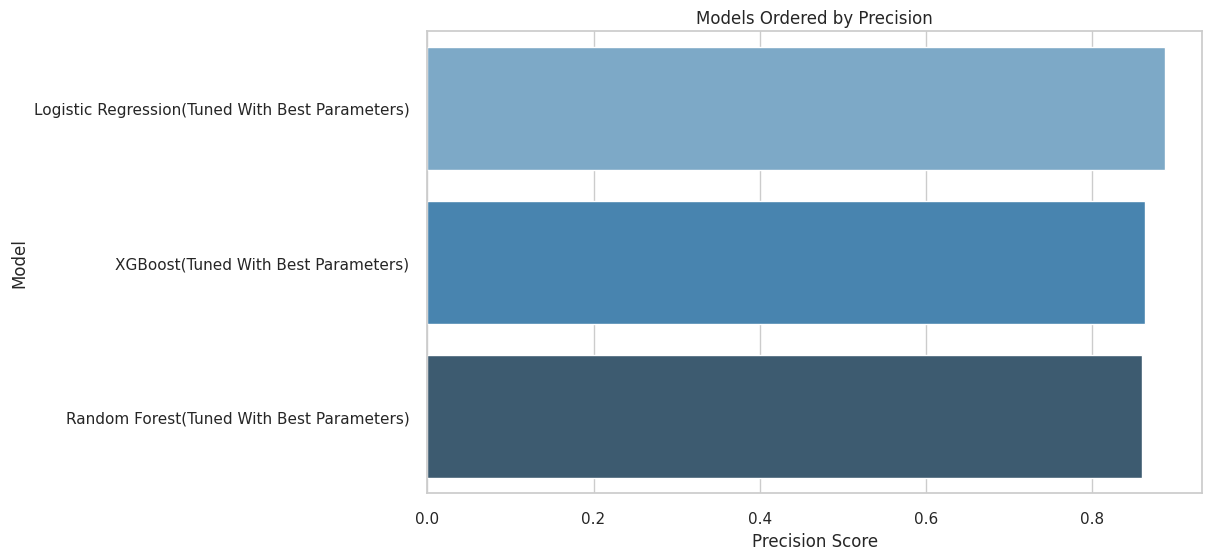

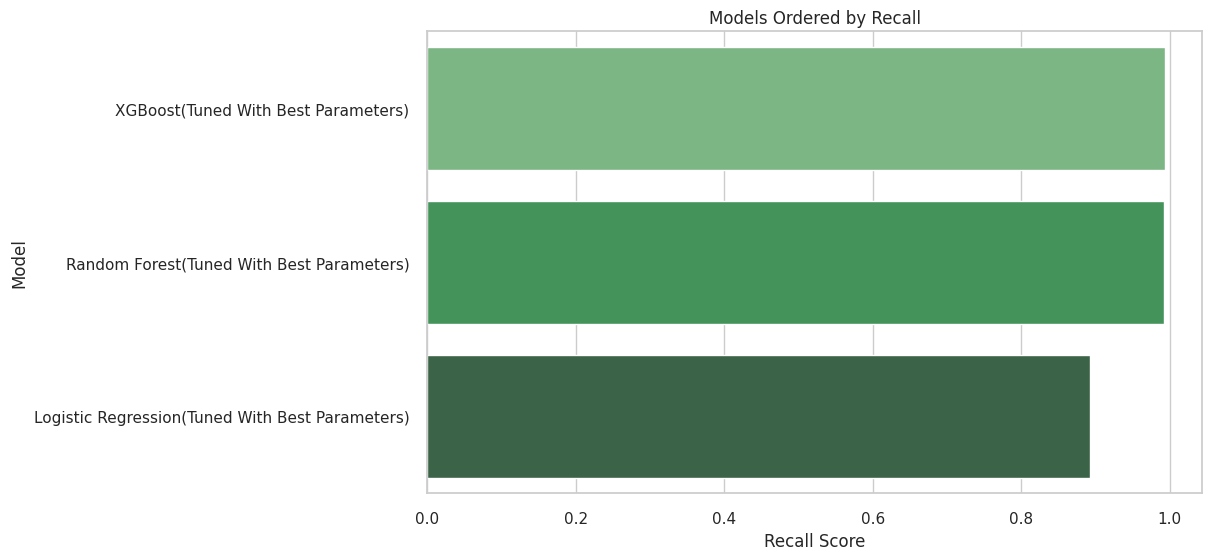

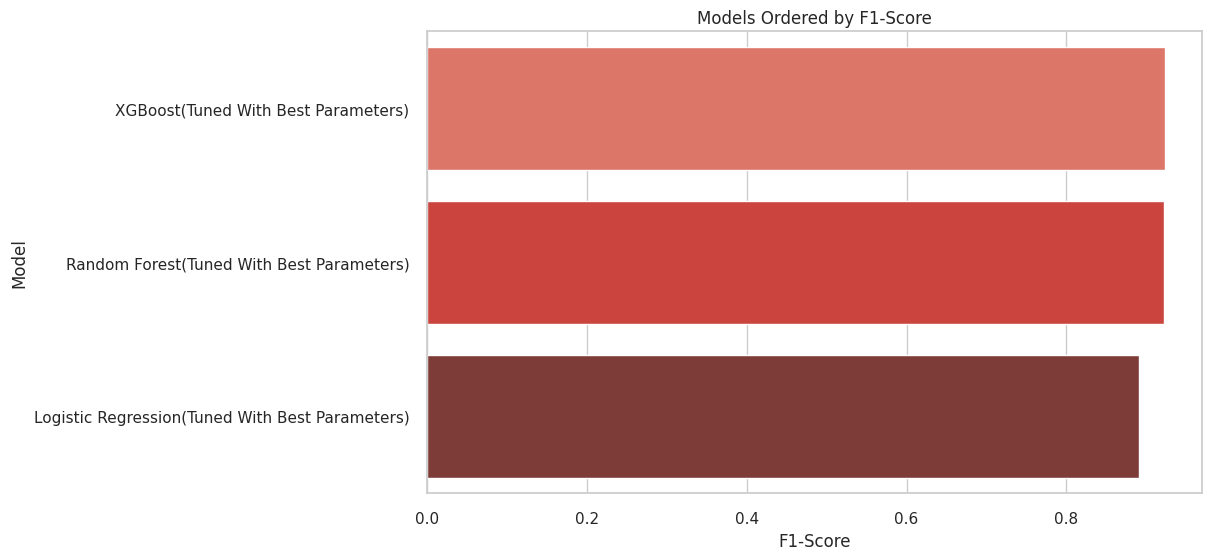

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model names and their corresponding best metrics (precision, recall, F1 score)
model_names = [
               "Logistic Regression(Tuned With Best Parameters)",
               "Random Forest(Tuned With Best Parameters)",
               "XGBoost(Tuned With Best Parameters)"]

precision_scores = [precision_logistic_best_lr, precision_rf_best, precision_xgb_best_test]
recall_scores = [recall_logistic_best_lr, recall_rf_best, recall_xgb_best_test]
f1_scores = [f1_logistic_best_lr, f1_rf_best, f1_xgb_best_test]


# Creating a DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Sorting the DataFrame for each metric
df_precision_sorted = df.sort_values(by='Precision', ascending=False)
df_recall_sorted = df.sort_values(by='Recall', ascending=False)
df_f1_sorted = df.sort_values(by='F1-Score', ascending=False)

# Set style for plots
sns.set(style="whitegrid")

# Plot for Precision
plt.figure(figsize=(10, 6))
sns.barplot(x="Precision", y="Model", data=df_precision_sorted, palette="Blues_d")
plt.title("Models Ordered by Precision")
plt.xlabel("Precision Score")
plt.ylabel("Model")
plt.show()

# Plot for Recall
plt.figure(figsize=(10, 6))
sns.barplot(x="Recall", y="Model", data=df_recall_sorted, palette="Greens_d")
plt.title("Models Ordered by Recall")
plt.xlabel("Recall Score")
plt.ylabel("Model")
plt.show()

# Plot for F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x="F1-Score", y="Model", data=df_f1_sorted, palette="Reds_d")
plt.title("Models Ordered by F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.show()

<font color='Green'><h1><b>Interpretation to best model<b></h1></font>

Logistic Regression

Strength:

<li>The model shows solid performance with a precision of 0.8882 and recall of 0.8924, which suggests it is effectively balanced in identifying both positive and negative classes based on the given parameters (C, l1_ratio, penalty, and solver).

Weakness:

<li>The precision and recall are slightly imbalanced, indicating the model might be conservative in predicting positive instances, which could lead to missing some positive cases despite the strong F1 score (0.8903).


<br><br>

Random Forest

Strength:

<li>The model performs well in recall (0.9925), meaning it is excellent at identifying most of the positive cases, which is supported by the selected parameters (max_depth, min_samples_leaf, min_samples_split, and n_estimators).

Weakness:

<li>The precision is relatively low (0.8602), indicating that while the model catches many positives, it also generates a significant number of false positives, which could be problematic in applications where false positives are costly.

<br><br>

XGBoost

Strength:

<li>XGBoost shows strong overall performance with precision (0.8631), recall (0.9944), and F1 score (0.9241), making it a well-rounded model, largely due to the parameter configuration (subsample, n_estimators, min_child_weight, max_depth, learning_rate, gamma, and colsample_bytree).

Weakness:

<li>Despite good recall, the precision (0.8631) is still moderate, suggesting that the model may still produce some false positives, even though it captures most of the positive cases effectively.

<font color='56c3ea'><h1><b>7.5 How did the models make decision(Explainable AI)</h1></font>

<font color='56c3ea'><h1><b>7.5.1 Logistic Regression (Explainable AI)</h1></font>

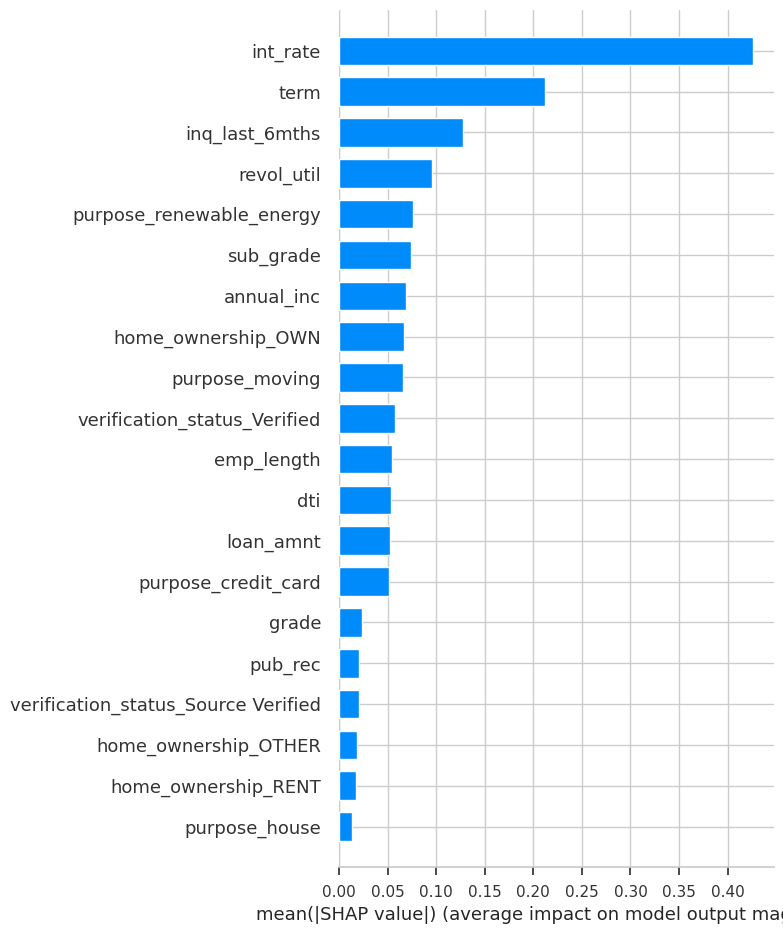

In [ ]:
import shap

# Create the SHAP explainer for Logistic Regression
explainer = shap.LinearExplainer(best_logistic_model , X_test_scaled)  # Use training data for fitting explainer

# Get SHAP values for a particular instance or a batch of instances
shap_values = explainer.shap_values(X_test_scaled)  # Get SHAP values for train data

features = loan_data.columns

# You can also visualize the SHAP values for multiple predictions (aggregate explanation)
shap.summary_plot(shap_values, X_test_scaled , feature_names=features, plot_type="bar")

<font color='Green'><h1><b>Interpretation <b></h1></font>


The plot reveals the relative importance of different features in predicting output. int_rate, term, and inq_last_6mths have the most significant impact, suggesting these factors strongly influence the model's output.Other reatures like revol_util (credit utilization) and annual_inc have influence as well.


<font color='56c3ea'><h1><b>8.0 Pycaret Results to my model results comparison </h1></font>

In [ ]:
# Initialize PyCaret setup
clf_setup = setup(data=loan_data,
                  target='loan_status',
                  train_size=0.8,
                  session_id=42)

# Compare multiple models
best_model = compare_models()

# Print the best model
print(best_model)

,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(38255, 34)"
4,Transformed data shape,"(38255, 40)"
5,Transformed train set shape,"(30604, 40)"
6,Transformed test set shape,"(7651, 40)"
7,Numeric features,11
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8546,0.5000,1.0000,0.8546,0.9216,0.0000,0.0000,0.0520
ridge,Ridge Classifier,0.8541,0.6666,0.9989,0.8549,0.9213,0.0042,0.0258,0.0510
lr,Logistic Regression,0.8536,0.6788,0.9982,0.8549,0.9210,0.0041,0.0200,1.0550
gbc,Gradient Boosting Classifier,0.8529,0.6703,0.9917,0.8583,0.9202,0.0473,0.0929,0.9370
rf,Random Forest Classifier,0.8517,0.6648,0.9925,0.8567,0.9196,0.0273,0.0598,0.6880
ada,Ada Boost Classifier,0.8510,0.6708,0.9880,0.8588,0.9189,0.0534,0.0925,0.2610
lightgbm,Light Gradient Boosting Machine,0.8508,0.6682,0.9882,0.8586,0.9188,0.0506,0.0886,131.7040
et,Extra Trees Classifier,0.8499,0.6594,0.9885,0.8576,0.9184,0.0386,0.0704,0.5690
lda,Linear Discriminant Analysis,0.8478,0.6657,0.9822,0.8597,0.9169,0.0614,0.0929,0.0600
svm,SVM - Linear Kernel,0.8441,0.5659,0.9829,0.8563,0.9145,0.0121,0.0214,0.1210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=42, strategy='prior')


<font color='Green'><h1><b>Interpretation <b></h1></font>

-Precision Comparison:
Your Logistic Regression model achieves a precision of 0.8882, which is higher than PyCaret's Logistic Regression precision of 0.8549. The Random Forest model in your setup achieves 0.8602, which is also higher than PyCaret's Random Forest precision of 0.8567. XGBoost achieves 0.8631, outperforming both Logistic Regression and Random Forest in PyCaret.


-Recall Comparison:
Random Forest (0.9925) and XGBoost (0.9944), have notably higher recall scores compared to PyCaret's Random Forest (0.9925). However, the Logistic Regression model in your setup (0.8924) lags behind PyCaret's Logistic Regression (0.9982).


-F1 Score Comparison:
XGBoost model delivers the highest F1 score (0.9241), followed by Random Forest (0.9217). PyCaret's Random Forest F1 score is slightly lower at 0.9196, while the Logistic Regression F1 scores from your setup (0.8903) are slightly lower than PyCaret's (0.9210).


In summary Random Forest and XGBoost outperformed PyCaret's models in precision, recall, and F1 score. However, Logistic Regression in PyCaret has a slightly better recall than model's logistic regression.

<font color='56c3ea'><h1><b>9.0 Future Work And Action Items </h1></font>

-Due to very high values of Metrics in XGBoost and Random Forest , these model might need further tuning in the future so that to improve their generalization.

-For random forest experimenting  with hyperparameters like , weights, max_features, min_samples_split, and max_depth to find the optimal balance between overfitting and generalization as well as implementing threshhold tuning.

-For XGBoost careful tuning of hyperparameters (like learning_rate, subsample, and max_depth) is needed , also parameters such as  early_stopping_rounds might help to avoid overfiting


-XGBoost and Random Forest performed well using technique such as SHAP and LIME may help to understand the model better.